# EDA & Data Cleaning
---
This notebook will be used to clean and explore the data.

In [942]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
# Set seed
np.random.seed(42)
random.seed(42)

---
## Load Data

In [944]:
# read demographic data
# demo = pd.read_excel('../data/combined_state_demo_data_2016_2022.xlsx', sheet_name = 'Data')
demo = pd.read_csv('../data/combined_state_demo_data_2016_2022.csv')
# check for missing values and print the shape
print(demo.isna().sum())
print(demo.shape)
demo.head()

state                               0
year                                0
total_pop                           0
white_pop                           0
black_pop                           1
hispanic_pop                        0
asian_pop                           0
native_pop                         20
islander_pop                      177
multi_race_pop                      0
median_income                       0
poverty_rate                        0
unemployment_rate                   0
unemployed_15_weeks                 0
labor_force_participation_rate      0
hs_grad_rate                        0
bachelors_grad_rate                 0
zhvi                                0
crude_rate_suicide                 12
crude_rate_od                      28
dtype: int64
(357, 20)


,state,year,total_pop,white_pop,black_pop,hispanic_pop,asian_pop,native_pop,islander_pop,multi_race_pop,median_income,poverty_rate,unemployment_rate,unemployed_15_weeks,labor_force_participation_rate,hs_grad_rate,bachelors_grad_rate,zhvi,crude_rate_suicide,crude_rate_od
0,AL,2022,4916000,0.645,0.252,0.048,0.014,0.002,NaN,0.039,59910,13.6,2.5,1.2,57.0,88.8,28.8,217335.1989,11.9,12.5
1,AL,2021,4900800,0.644,0.255,0.047,0.013,0.004,NaN,0.037,56930,15.9,3.4,2.0,56.6,87.9,27.4,193148.7979,14.2,14.6
2,AL,2020,0,0.000,0,0.000,0.000,0,0,0.000,54690,14.9,6.4,1.4,57.2,88.0,27.8,169855.5743,15.2,12.8
3,AL,2019,4767100,0.654,0.265,0.044,0.014,0.004,NaN,0.019,56200,12.9,3.2,1.4,57.7,87.1,26.3,157202.1806,14.8,8.3
4,AL,2018,4752600,0.656,0.265,0.043,0.013,<.01,NaN,0.019,49940,16.0,3.9,1.6,57.3,86.6,25.5,148927.5094,17.0,6.7


In [945]:
# read crime data
crime = pd.read_csv('../data/transformed_crime_data.csv')
# rename the 'data_year' column to 'year' and update column names to lowercase with underscores
crime.columns = crime.columns.str.lower().str.replace(' ', '_')
crime.rename(columns={'data_year': 'year'}, inplace=True)
# check for missing values and print the shape
print(crime.isna().sum())
print(crime.shape)
crime.head()

state                                       0
offender_age                                0
year                                        0
count:__crimes_against_society              0
count:__fraud_and_other_financial_crimes    0
count:__property_crime                      0
count:__violent_crime                       0
rate:__crimes_against_society               0
rate:__fraud_and_other_financial_crimes     0
rate:__property_crime                       0
rate:__violent_crime                        0
dtype: int64
(213, 11)


,state,offender_age,year,count:__crimes_against_society,count:__fraud_and_other_financial_crimes,count:__property_crime,count:__violent_crime,rate:__crimes_against_society,rate:__fraud_and_other_financial_crimes,rate:__property_crime,rate:__violent_crime
0,AK,15-24,2021,329,77,849,1302,44.76,10.48,115.53,177.17
1,AK,15-24,2022,313,75,844,1296,42.69,10.22,115.10,176.75
2,AL,15-24,2016,198,42,159,234,3.94,0.84,3.17,4.66
3,AL,15-24,2017,330,27,117,191,6.57,0.54,2.33,3.80
4,AL,15-24,2018,66,31,74,105,1.31,0.62,1.47,2.09


In [946]:
# read youth data
youth = pd.read_csv('../data/youth data.csv')
# update column names to lowercase with underscores
youth.columns = youth.columns.str.lower().str.replace(' ', '_')

print(youth.isna().sum())
print(youth.shape)


state                        0
year                         0
youth_not_in_school          0
youth_in_foster_care       102
youth_living_in_poverty      0
dtype: int64
(306, 5)


---
### Merge Data

In [948]:
# merge demographic and crime data
demo_crime = pd.merge(left = demo, right = crime, how = 'left', left_on = ['state','year'], right_on = ['state','year'])

print(demo_crime.shape)
demo_crime.head()
demo_crime.isna().sum()

(357, 29)


state                                         0
year                                          0
total_pop                                     0
white_pop                                     0
black_pop                                     1
hispanic_pop                                  0
asian_pop                                     0
native_pop                                   20
islander_pop                                177
multi_race_pop                                0
median_income                                 0
poverty_rate                                  0
unemployment_rate                             0
unemployed_15_weeks                           0
labor_force_participation_rate                0
hs_grad_rate                                  0
bachelors_grad_rate                           0
zhvi                                          0
crude_rate_suicide                           12
crude_rate_od                                28
offender_age                            

In [949]:
# merge youth data
combined = pd.merge(left = demo_crime, right = youth, how = 'left', left_on = ['state','year'], right_on = ['state','year'])

In [950]:


# save combined dataframe as .csv
combined.to_csv('../data/state_demo_crime_youth_data_combined.csv',index=False)

print(combined.shape)
print(combined.isna().sum())
combined.head()

(357, 32)
state                                         0
year                                          0
total_pop                                     0
white_pop                                     0
black_pop                                     1
hispanic_pop                                  0
asian_pop                                     0
native_pop                                   20
islander_pop                                177
multi_race_pop                                0
median_income                                 0
poverty_rate                                  0
unemployment_rate                             0
unemployed_15_weeks                           0
labor_force_participation_rate                0
hs_grad_rate                                  0
bachelors_grad_rate                           0
zhvi                                          0
crude_rate_suicide                           12
crude_rate_od                                28
offender_age                  

,state,year,total_pop,white_pop,black_pop,hispanic_pop,asian_pop,native_pop,islander_pop,multi_race_pop,...,count:__fraud_and_other_financial_crimes,count:__property_crime,count:__violent_crime,rate:__crimes_against_society,rate:__fraud_and_other_financial_crimes,rate:__property_crime,rate:__violent_crime,youth_not_in_school,youth_in_foster_care,youth_living_in_poverty
0,AL,2022,4916000,0.645,0.252,0.048,0.014,0.002,NaN,0.039,...,1827.0,12861.0,15169.0,189.36,36.01,253.48,298.96,73000.0,NaN,240000.0
1,AL,2021,4900800,0.644,0.255,0.047,0.013,0.004,NaN,0.037,...,1236.0,11104.0,11055.0,128.17,24.48,219.86,218.90,86000.0,NaN,245000.0
2,AL,2020,0,0.000,0,0.000,0.000,0,0,0.000,...,90.0,650.0,839.0,13.00,1.79,12.91,16.67,NaN,NaN,NaN
3,AL,2019,4767100,0.654,0.265,0.044,0.014,0.004,NaN,0.019,...,61.0,342.0,217.0,3.74,1.21,6.80,4.32,74000.0,800.0,228000.0
4,AL,2018,4752600,0.656,0.265,0.043,0.013,<.01,NaN,0.019,...,31.0,74.0,105.0,1.31,0.62,1.47,2.09,86000.0,829.0,255000.0


---
## Data Cleaning

### Drop Columns

In [953]:
# drop offender_age
combined.drop(columns = ['offender_age'],
              inplace = True)

print(combined.shape)
combined.head()

(357, 31)


,state,year,total_pop,white_pop,black_pop,hispanic_pop,asian_pop,native_pop,islander_pop,multi_race_pop,...,count:__fraud_and_other_financial_crimes,count:__property_crime,count:__violent_crime,rate:__crimes_against_society,rate:__fraud_and_other_financial_crimes,rate:__property_crime,rate:__violent_crime,youth_not_in_school,youth_in_foster_care,youth_living_in_poverty
0,AL,2022,4916000,0.645,0.252,0.048,0.014,0.002,NaN,0.039,...,1827.0,12861.0,15169.0,189.36,36.01,253.48,298.96,73000.0,NaN,240000.0
1,AL,2021,4900800,0.644,0.255,0.047,0.013,0.004,NaN,0.037,...,1236.0,11104.0,11055.0,128.17,24.48,219.86,218.90,86000.0,NaN,245000.0
2,AL,2020,0,0.000,0,0.000,0.000,0,0,0.000,...,90.0,650.0,839.0,13.00,1.79,12.91,16.67,NaN,NaN,NaN
3,AL,2019,4767100,0.654,0.265,0.044,0.014,0.004,NaN,0.019,...,61.0,342.0,217.0,3.74,1.21,6.80,4.32,74000.0,800.0,228000.0
4,AL,2018,4752600,0.656,0.265,0.043,0.013,<.01,NaN,0.019,...,31.0,74.0,105.0,1.31,0.62,1.47,2.09,86000.0,829.0,255000.0


### Format Columns

#### Fix Data Types

In [956]:
# check data types
combined.dtypes

state                                        object
year                                          int64
total_pop                                     int64
white_pop                                   float64
black_pop                                    object
hispanic_pop                                float64
asian_pop                                   float64
native_pop                                   object
islander_pop                                 object
multi_race_pop                              float64
median_income                                 int64
poverty_rate                                float64
unemployment_rate                           float64
unemployed_15_weeks                         float64
labor_force_participation_rate              float64
hs_grad_rate                                float64
bachelors_grad_rate                         float64
zhvi                                        float64
crude_rate_suicide                          float64
crude_rate_o

In [957]:
# fix objects
combined['black_pop'] = combined['black_pop'].astype(str).str.replace('<','').astype(float)
combined['native_pop'] = combined['native_pop'].astype(str).str.replace('<','').astype(float)
combined['islander_pop'] = combined['islander_pop'].astype(str).str.replace('<','').astype(float)

combined.head()

,state,year,total_pop,white_pop,black_pop,hispanic_pop,asian_pop,native_pop,islander_pop,multi_race_pop,...,count:__fraud_and_other_financial_crimes,count:__property_crime,count:__violent_crime,rate:__crimes_against_society,rate:__fraud_and_other_financial_crimes,rate:__property_crime,rate:__violent_crime,youth_not_in_school,youth_in_foster_care,youth_living_in_poverty
0,AL,2022,4916000,0.645,0.252,0.048,0.014,0.002,NaN,0.039,...,1827.0,12861.0,15169.0,189.36,36.01,253.48,298.96,73000.0,NaN,240000.0
1,AL,2021,4900800,0.644,0.255,0.047,0.013,0.004,NaN,0.037,...,1236.0,11104.0,11055.0,128.17,24.48,219.86,218.90,86000.0,NaN,245000.0
2,AL,2020,0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,...,90.0,650.0,839.0,13.00,1.79,12.91,16.67,NaN,NaN,NaN
3,AL,2019,4767100,0.654,0.265,0.044,0.014,0.004,NaN,0.019,...,61.0,342.0,217.0,3.74,1.21,6.80,4.32,74000.0,800.0,228000.0
4,AL,2018,4752600,0.656,0.265,0.043,0.013,0.010,NaN,0.019,...,31.0,74.0,105.0,1.31,0.62,1.47,2.09,86000.0,829.0,255000.0


In [958]:
# check data types
combined.dtypes

state                                        object
year                                          int64
total_pop                                     int64
white_pop                                   float64
black_pop                                   float64
hispanic_pop                                float64
asian_pop                                   float64
native_pop                                  float64
islander_pop                                float64
multi_race_pop                              float64
median_income                                 int64
poverty_rate                                float64
unemployment_rate                           float64
unemployed_15_weeks                         float64
labor_force_participation_rate              float64
hs_grad_rate                                float64
bachelors_grad_rate                         float64
zhvi                                        float64
crude_rate_suicide                          float64
crude_rate_o

#### Fix 2020 Population Data

In [960]:
# check population data for 2020
combined[['year','total_pop','white_pop','black_pop',
          'hispanic_pop','asian_pop','native_pop',
          'islander_pop','multi_race_pop']].loc[combined['year'] == 2020]

,year,total_pop,white_pop,black_pop,hispanic_pop,asian_pop,native_pop,islander_pop,multi_race_pop
2,2020,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2020,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,2020,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,2020,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,2020,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,2020,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44,2020,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51,2020,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58,2020,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65,2020,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [961]:
# fill missing 2020 data with average of 2019 and 2021 data
combined.head()

for row in range(len(combined)):
    if combined.loc[row, 'year'] == 2020:
        combined.loc[row,'total_pop'] = (np.abs(combined['total_pop'][row + 1]) + np.abs(combined['total_pop'][row - 1])) / 2
        combined.loc[row,'white_pop'] = (np.abs(combined['white_pop'][row + 1]) + np.abs(combined['white_pop'][row - 1])) / 2
        combined.loc[row,'black_pop'] = (np.abs(combined['black_pop'][row + 1]) + np.abs(combined['black_pop'][row - 1])) / 2
        combined.loc[row,'hispanic_pop'] = (np.abs(combined['hispanic_pop'][row + 1]) + np.abs(combined['hispanic_pop'][row - 1])) / 2
        combined.loc[row,'asian_pop'] = (np.abs(combined['asian_pop'][row + 1]) + np.abs(combined['asian_pop'][row - 1])) / 2
        combined.loc[row,'native_pop'] = (np.abs(combined['native_pop'][row + 1]) + np.abs(combined['native_pop'][row - 1])) / 2
        combined.loc[row,'islander_pop'] = (np.abs(combined['islander_pop'][row + 1]) + np.abs(combined['islander_pop'][row - 1])) / 2
        combined.loc[row,'multi_race_pop'] = (np.abs(combined['multi_race_pop'][row + 1]) + np.abs(combined['multi_race_pop'][row - 1])) / 2

combined.head()    

,state,year,total_pop,white_pop,black_pop,hispanic_pop,asian_pop,native_pop,islander_pop,multi_race_pop,...,count:__fraud_and_other_financial_crimes,count:__property_crime,count:__violent_crime,rate:__crimes_against_society,rate:__fraud_and_other_financial_crimes,rate:__property_crime,rate:__violent_crime,youth_not_in_school,youth_in_foster_care,youth_living_in_poverty
0,AL,2022,4916000,0.645,0.252,0.0480,0.0140,0.002,NaN,0.039,...,1827.0,12861.0,15169.0,189.36,36.01,253.48,298.96,73000.0,NaN,240000.0
1,AL,2021,4900800,0.644,0.255,0.0470,0.0130,0.004,NaN,0.037,...,1236.0,11104.0,11055.0,128.17,24.48,219.86,218.90,86000.0,NaN,245000.0
2,AL,2020,4833950,0.649,0.260,0.0455,0.0135,0.004,NaN,0.028,...,90.0,650.0,839.0,13.00,1.79,12.91,16.67,NaN,NaN,NaN
3,AL,2019,4767100,0.654,0.265,0.0440,0.0140,0.004,NaN,0.019,...,61.0,342.0,217.0,3.74,1.21,6.80,4.32,74000.0,800.0,228000.0
4,AL,2018,4752600,0.656,0.265,0.0430,0.0130,0.010,NaN,0.019,...,31.0,74.0,105.0,1.31,0.62,1.47,2.09,86000.0,829.0,255000.0


In [962]:
# check population data for 2020

combined[['year','total_pop','white_pop','black_pop',
          'hispanic_pop','asian_pop','native_pop',
          'islander_pop','multi_race_pop']].loc[combined['year'] == 2020]

,year,total_pop,white_pop,black_pop,hispanic_pop,asian_pop,native_pop,islander_pop,multi_race_pop
2,2020,4833950,0.6490,0.2600,0.0455,0.0135,0.0040,NaN,0.0280
9,2020,700200,0.5895,0.0240,0.0685,0.0650,0.1445,0.0150,0.0940
16,2020,7102650,0.5315,0.0420,0.3210,0.0330,0.0360,0.0020,0.0355
23,2020,2929450,0.7020,0.1480,0.0805,0.0150,0.0050,0.0040,0.0460
30,2020,38510950,0.3530,0.0520,0.3990,0.1490,0.0030,0.0035,0.0400
37,2020,5638000,0.6655,0.0370,0.2200,0.0315,0.0040,0.0015,0.0405
44,2020,3477400,0.6425,0.0985,0.1735,0.0465,0.0015,NaN,0.0375
51,2020,957200,0.6045,0.2105,0.0995,0.0400,NaN,NaN,0.0425
58,2020,652350,0.3630,0.4405,0.1135,0.0375,NaN,NaN,0.0430
65,2020,21148350,0.5210,0.1470,0.2680,0.0275,0.0015,0.0005,0.0350


#### Convert % Columns to Rates

In [964]:
# Convert % columns to rates
print(f"Poverty Rate min BEFORE: {combined['poverty_rate'].min()}")
combined['poverty_rate'] = combined['poverty_rate'] / 100
print(f"Poverty Rate min AFTER: {combined['poverty_rate'].min()}")
print("=" * 30)

print(f"Unemployment Rate min BEFORE: {combined['unemployment_rate'].min()}")
combined['unemployment_rate'] = combined['unemployment_rate'] / 100
print(f"Unemployment Rate min AFTER: {combined['unemployment_rate'].min()}")
print("=" * 30)

print(f"Unemployed 15 Weeks Rate min BEFORE: {combined['unemployed_15_weeks'].min()}")
combined['unemployed_15_weeks'] = combined['unemployed_15_weeks'] / 100
print(f"Unemployed 15 Weeks Rate min AFTER: {combined['unemployed_15_weeks'].min()}")
print("=" * 30)

print(f"Labor Force Participation Rate min BEFORE: {combined['labor_force_participation_rate'].min()}")
combined['labor_force_participation_rate'] = combined['labor_force_participation_rate'] / 100
print(f"Labor Force Participation Rate min AFTER: {combined['labor_force_participation_rate'].min()}")
print("=" * 30)

print(f"High School+ Graduation Rate min BEFORE: {combined['hs_grad_rate'].min()}")
combined['hs_grad_rate'] = combined['hs_grad_rate'] / 100
print(f"High School+ Graduation Rate min AFTER: {combined['hs_grad_rate'].min()}")
print("=" * 30)

print(f"Bachelors+ Graduation Rate min BEFORE: {combined['bachelors_grad_rate'].min()}")
combined['bachelors_grad_rate'] = combined['bachelors_grad_rate'] / 100
print(f"Bachelors+ Graduation Rate min AFTER: {combined['bachelors_grad_rate'].min()}")
print("=" * 30)

combined.head()


Poverty Rate min BEFORE: 3.7
Poverty Rate min AFTER: 0.037000000000000005
Unemployment Rate min BEFORE: 2.0
Unemployment Rate min AFTER: 0.02
Unemployed 15 Weeks Rate min BEFORE: 0.5
Unemployed 15 Weeks Rate min AFTER: 0.005
Labor Force Participation Rate min BEFORE: 53.3
Labor Force Participation Rate min AFTER: 0.5329999999999999
High School+ Graduation Rate min BEFORE: 82.4
High School+ Graduation Rate min AFTER: 0.8240000000000001
Bachelors+ Graduation Rate min BEFORE: 20.2
Bachelors+ Graduation Rate min AFTER: 0.20199999999999999


,state,year,total_pop,white_pop,black_pop,hispanic_pop,asian_pop,native_pop,islander_pop,multi_race_pop,...,count:__fraud_and_other_financial_crimes,count:__property_crime,count:__violent_crime,rate:__crimes_against_society,rate:__fraud_and_other_financial_crimes,rate:__property_crime,rate:__violent_crime,youth_not_in_school,youth_in_foster_care,youth_living_in_poverty
0,AL,2022,4916000,0.645,0.252,0.0480,0.0140,0.002,NaN,0.039,...,1827.0,12861.0,15169.0,189.36,36.01,253.48,298.96,73000.0,NaN,240000.0
1,AL,2021,4900800,0.644,0.255,0.0470,0.0130,0.004,NaN,0.037,...,1236.0,11104.0,11055.0,128.17,24.48,219.86,218.90,86000.0,NaN,245000.0
2,AL,2020,4833950,0.649,0.260,0.0455,0.0135,0.004,NaN,0.028,...,90.0,650.0,839.0,13.00,1.79,12.91,16.67,NaN,NaN,NaN
3,AL,2019,4767100,0.654,0.265,0.0440,0.0140,0.004,NaN,0.019,...,61.0,342.0,217.0,3.74,1.21,6.80,4.32,74000.0,800.0,228000.0
4,AL,2018,4752600,0.656,0.265,0.0430,0.0130,0.010,NaN,0.019,...,31.0,74.0,105.0,1.31,0.62,1.47,2.09,86000.0,829.0,255000.0


### Remove Nulls

In [966]:
combined.columns

Index(['state', 'year', 'total_pop', 'white_pop', 'black_pop', 'hispanic_pop',
       'asian_pop', 'native_pop', 'islander_pop', 'multi_race_pop',
       'median_income', 'poverty_rate', 'unemployment_rate',
       'unemployed_15_weeks', 'labor_force_participation_rate', 'hs_grad_rate',
       'bachelors_grad_rate', 'zhvi', 'crude_rate_suicide', 'crude_rate_od',
       'count:__crimes_against_society',
       'count:__fraud_and_other_financial_crimes', 'count:__property_crime',
       'count:__violent_crime', 'rate:__crimes_against_society',
       'rate:__fraud_and_other_financial_crimes', 'rate:__property_crime',
       'rate:__violent_crime', 'youth_not_in_school', 'youth_in_foster_care',
       'youth_living_in_poverty'],
      dtype='object')

In [967]:
# check nulls
print(combined.shape)
combined.isnull().sum()

(357, 31)


state                                         0
year                                          0
total_pop                                     0
white_pop                                     0
black_pop                                     1
hispanic_pop                                  0
asian_pop                                     0
native_pop                                   26
islander_pop                                209
multi_race_pop                                0
median_income                                 0
poverty_rate                                  0
unemployment_rate                             0
unemployed_15_weeks                           0
labor_force_participation_rate                0
hs_grad_rate                                  0
bachelors_grad_rate                           0
zhvi                                          0
crude_rate_suicide                           12
crude_rate_od                                28
count:__crimes_against_society          

In [968]:
# replace NaN in native_pop and islander_pop with 0
# these were states that didn't report having a specific pop
combined['black_pop'] = combined['black_pop'].fillna(0)
combined['native_pop'] = combined['native_pop'].fillna(0)
combined['islander_pop'] = combined['islander_pop'].fillna(0)

print(f"black_pop null count: {combined['black_pop'].isnull().sum()}")
print(f"native_pop null count: {combined['native_pop'].isnull().sum()}")
print(f"islander_pop null count: {combined['islander_pop'].isnull().sum()}")

black_pop null count: 0
native_pop null count: 0
islander_pop null count: 0


In [969]:
# missing values in youth columns
youth_not_in_school_null = combined[combined['youth_not_in_school'].isnull()]
youth_not_in_school_null.head()
# fill missing values in youth_columns and other missing columns by taking the mean for each state
missing_data_columns = ['youth_not_in_school', 'youth_in_foster_care', 'youth_living_in_poverty','crude_rate_suicide','crude_rate_od']
combined['crude_rate_suicide'] = combined['crude_rate_suicide'].fillna(0)
# group-based mean imputation for each column within each state
for column in missing_data_columns:
    combined[column] = combined.groupby('state')[column].transform(lambda x: x.fillna(x.mean()))
combined.head()


,state,year,total_pop,white_pop,black_pop,hispanic_pop,asian_pop,native_pop,islander_pop,multi_race_pop,...,count:__fraud_and_other_financial_crimes,count:__property_crime,count:__violent_crime,rate:__crimes_against_society,rate:__fraud_and_other_financial_crimes,rate:__property_crime,rate:__violent_crime,youth_not_in_school,youth_in_foster_care,youth_living_in_poverty
0,AL,2022,4916000,0.645,0.252,0.0480,0.0140,0.002,0.0,0.039,...,1827.0,12861.0,15169.0,189.36,36.01,253.48,298.96,73000.0,819.25,240000.000000
1,AL,2021,4900800,0.644,0.255,0.0470,0.0130,0.004,0.0,0.037,...,1236.0,11104.0,11055.0,128.17,24.48,219.86,218.90,86000.0,819.25,245000.000000
2,AL,2020,4833950,0.649,0.260,0.0455,0.0135,0.004,0.0,0.028,...,90.0,650.0,839.0,13.00,1.79,12.91,16.67,82000.0,819.25,249833.333333
3,AL,2019,4767100,0.654,0.265,0.0440,0.0140,0.004,0.0,0.019,...,61.0,342.0,217.0,3.74,1.21,6.80,4.32,74000.0,800.00,228000.000000
4,AL,2018,4752600,0.656,0.265,0.0430,0.0130,0.010,0.0,0.019,...,31.0,74.0,105.0,1.31,0.62,1.47,2.09,86000.0,829.00,255000.000000


In [970]:
combined.shape

(357, 31)

In [971]:
#drop columns where crime data is null 
combined.dropna(inplace=True)

In [972]:
# combining crime-related columns to create a new 'total_ crime_count' column
# summing up 'crimes_against_society', 'fraud_and_other_financial_crimes', 'property_crime', and 'violent_crime' columns

# ensuring we handle any missing values during summation by filling NaN with 0 temporarily
combined['total_crime_count'] = combined[['count:__crimes_against_society', 
                           'count:__fraud_and_other_financial_crimes', 
                           'count:__property_crime', 
                           'count:__violent_crime']].fillna(0).sum(axis=1)
# ensuring we handle any missing values during summation by filling NaN with 0 temporarily
combined['total_crime_rate'] = combined[['rate:__crimes_against_society', 
                           'rate:__fraud_and_other_financial_crimes', 
                           'rate:__property_crime', 
                           'rate:__violent_crime']].fillna(0).sum(axis=1)


# first few rows to confirm the new 'total_ crime_count' column
combined[['state', 'year', 'count:__crimes_against_society', 'count:__fraud_and_other_financial_crimes', 
      'count:__property_crime', 'count:__violent_crime', 'total_crime_count']].head()


,state,year,count:__crimes_against_society,count:__fraud_and_other_financial_crimes,count:__property_crime,count:__violent_crime,total_crime_count
0,AL,2022,9608.0,1827.0,12861.0,15169.0,39465.0
1,AL,2021,6473.0,1236.0,11104.0,11055.0,29868.0
2,AL,2020,654.0,90.0,650.0,839.0,2233.0
3,AL,2019,188.0,61.0,342.0,217.0,808.0
4,AL,2018,66.0,31.0,74.0,105.0,276.0


## EDA

### Data Statistics

In [975]:
# summary_statistics of data
combined.describe()

,year,total_pop,white_pop,black_pop,hispanic_pop,asian_pop,native_pop,islander_pop,multi_race_pop,median_income,...,count:__violent_crime,rate:__crimes_against_society,rate:__fraud_and_other_financial_crimes,rate:__property_crime,rate:__violent_crime,youth_not_in_school,youth_in_foster_care,youth_living_in_poverty,total_crime_count,total_crime_rate
count,213.000000,2.130000e+02,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,...,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,2.130000e+02,213.000000,213.000000
mean,2019.291080,5.203017e+06,0.672563,0.118061,0.114305,0.040469,0.013542,0.003988,0.039669,67661.361502,...,8450.906103,140.015634,25.135915,191.400469,187.925915,71413.928013,1049.219484,2.027394e+05,22850.868545,544.477934
std,1.971439,5.169449e+06,0.164641,0.112780,0.098174,0.057328,0.022419,0.014988,0.029806,13129.808500,...,8975.105128,111.416137,21.205599,147.986293,115.425936,72420.551416,1162.595858,1.967955e+05,22608.387899,359.485201
min,2016.000000,6.334000e+05,0.195000,0.000000,0.015000,0.006000,0.000000,0.000000,0.014000,42200.000000,...,31.000000,0.790000,0.070000,0.390000,0.290000,5000.000000,93.000000,1.700000e+04,165.000000,1.540000
25%,2018.000000,1.807950e+06,0.574000,0.036000,0.044000,0.016000,0.002000,0.000000,0.025000,57680.000000,...,2372.000000,44.200000,9.110000,83.150000,96.540000,19000.000000,235.000000,6.000000e+04,8013.000000,244.680000
50%,2019.000000,3.803700e+06,0.687000,0.086000,0.097000,0.026500,0.006000,0.000000,0.032000,66050.000000,...,4732.000000,119.110000,20.250000,161.320000,189.330000,58000.000000,819.250000,1.520000e+05,14556.000000,531.520000
75%,2021.000000,6.601300e+06,0.795000,0.144000,0.129000,0.041000,0.010000,0.001000,0.047000,75920.000000,...,11689.000000,204.530000,36.290000,274.500000,261.560000,91666.666667,1448.750000,2.660000e+05,29900.000000,788.390000
max,2022.000000,3.837920e+07,0.937000,0.468000,0.505000,0.394000,0.138000,0.102000,0.232000,108200.000000,...,40350.000000,469.920000,125.860000,857.740000,637.010000,570000.000000,9572.500000,1.363000e+06,109535.000000,1618.970000


### Distribution of Target

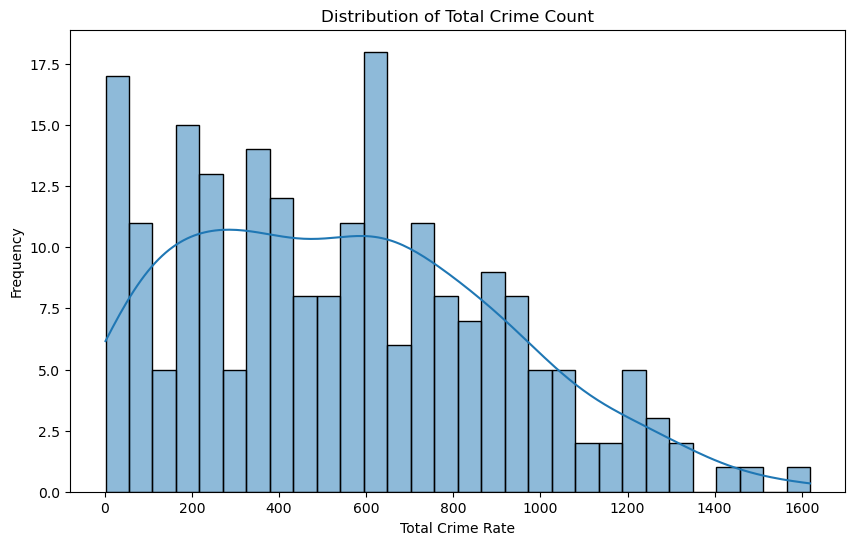

In [977]:

# distribution of 'total_crime_count'
plt.figure(figsize=(10, 6))

sns.histplot(combined['total_crime_rate'], kde=True, bins=30)
plt.title('Distribution of Total Crime Count')
plt.xlabel('Total Crime Rate')
plt.ylabel('Frequency');

The distribution of total crime rates in this dataset is right-skewed, with most data points concentrated around lower crime rates and a few outliers with very high rates extending the tail to the right. So we need to take log of our target.

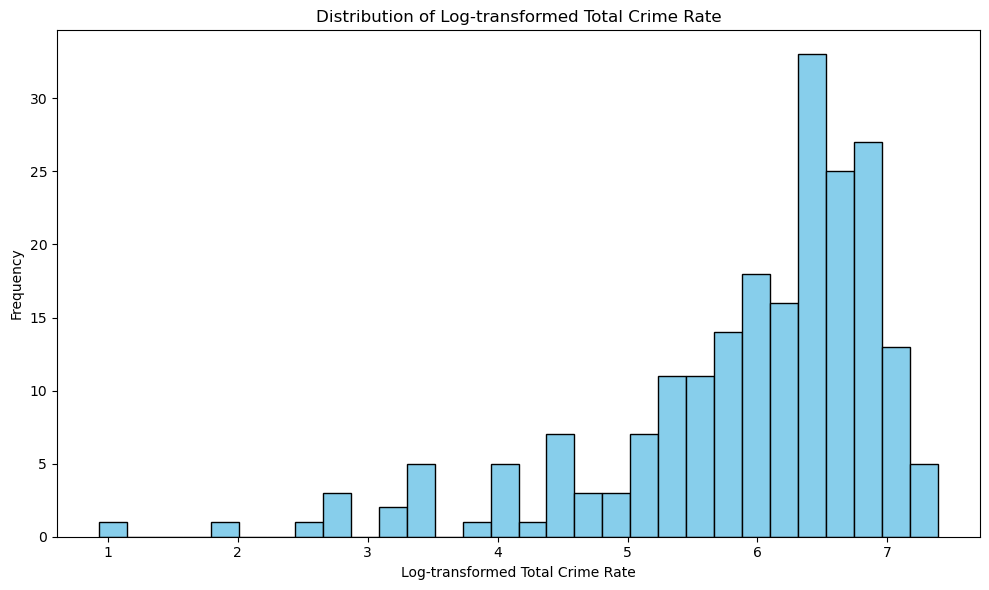

In [979]:
combined['log_total_crime_rate'] = np.log1p(combined['total_crime_rate'])
combined['log_total_crime_rate']

# Plotting the distribution of the log-transformed total crime rate
plt.figure(figsize=(10, 6))
plt.hist(combined['log_total_crime_rate'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Log-transformed Total Crime Rate')
plt.xlabel('Log-transformed Total Crime Rate')
plt.ylabel('Frequency');
plt.tight_layout()
plt.savefig('../img/distribution_log_transformed_total_crime_rate.jpg')

The log-transformed plot of total crime rate shows a much more normalized distribution compared to the original, right-skewed data.

### Correlation between features

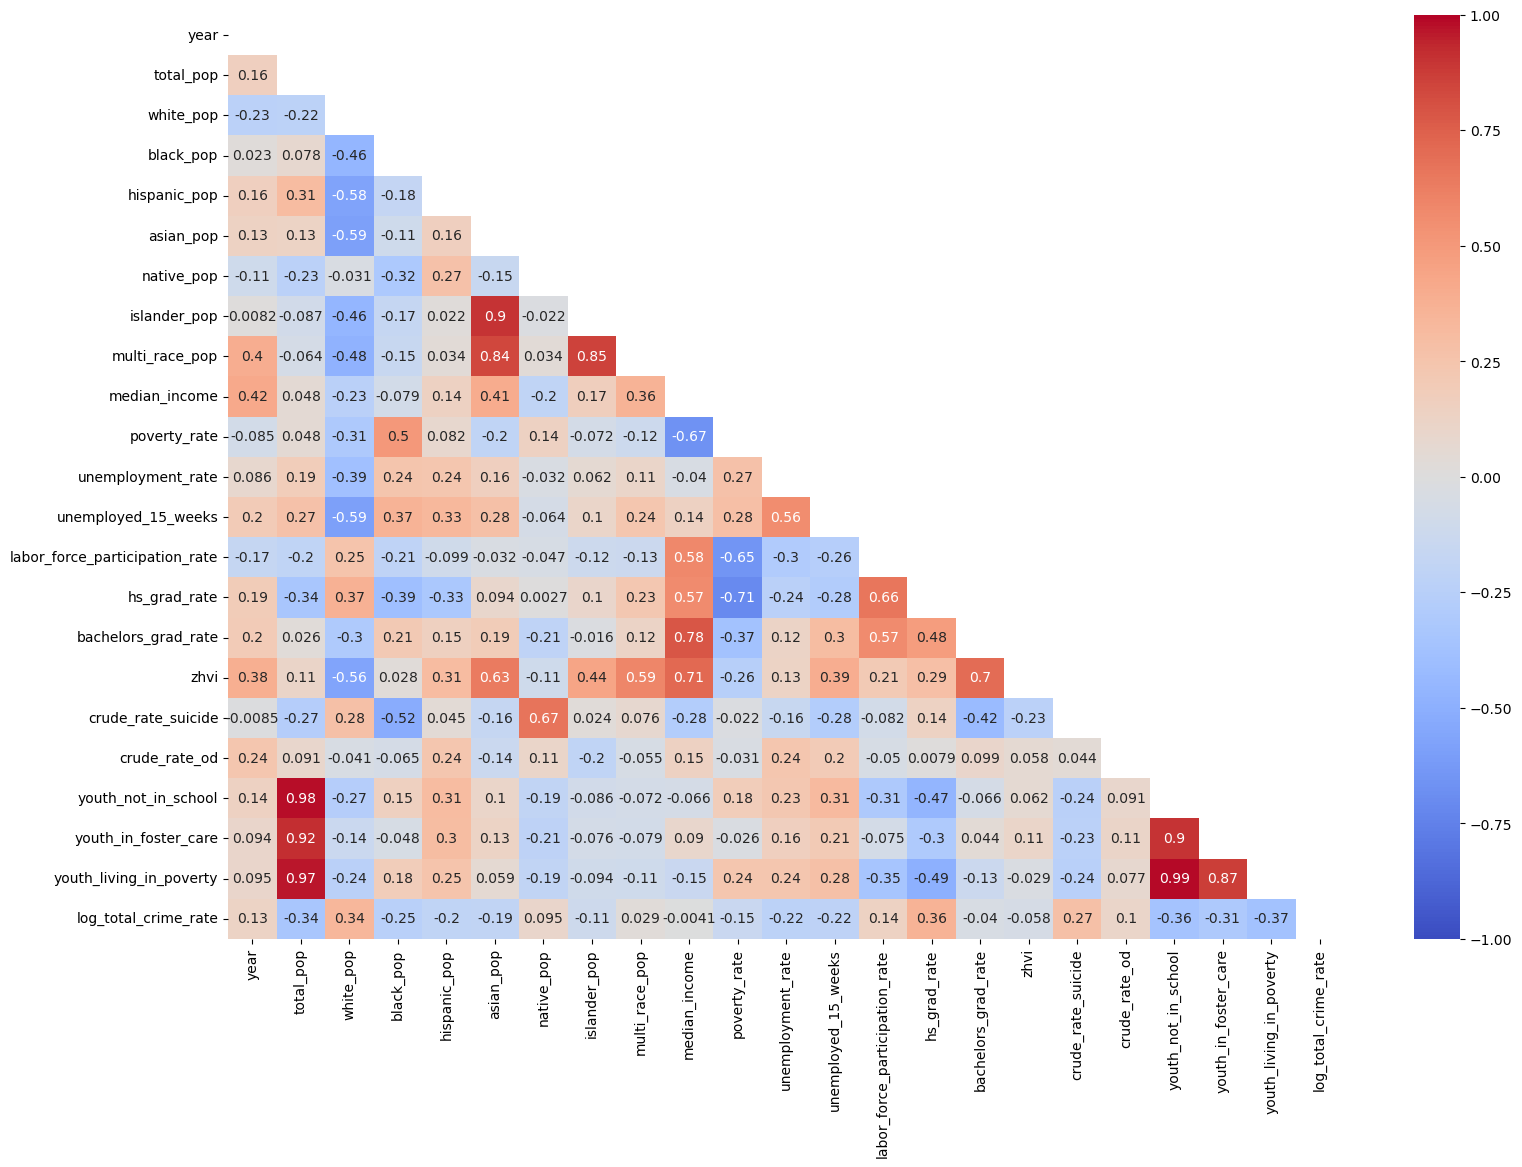

In [982]:

# crime related features
crime_related_features = [
    'count:__crimes_against_society', 
                           'count:__fraud_and_other_financial_crimes', 
                           'count:__property_crime', 
                           'count:__violent_crime', 'total_crime_count','rate:__crimes_against_society', 
                           'rate:__fraud_and_other_financial_crimes', 
                           'rate:__property_crime', 
                           'rate:__violent_crime','total_crime_count','total_crime_rate'
]
combined_filtered = combined.drop(columns=crime_related_features)

# correlation heatmap to show relationships between features
corr = combined_filtered.corr(numeric_only=True)
plt.figure(figsize=(18, 12))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot= True,vmax=1,vmin=-1,cmap='coolwarm',mask=mask);


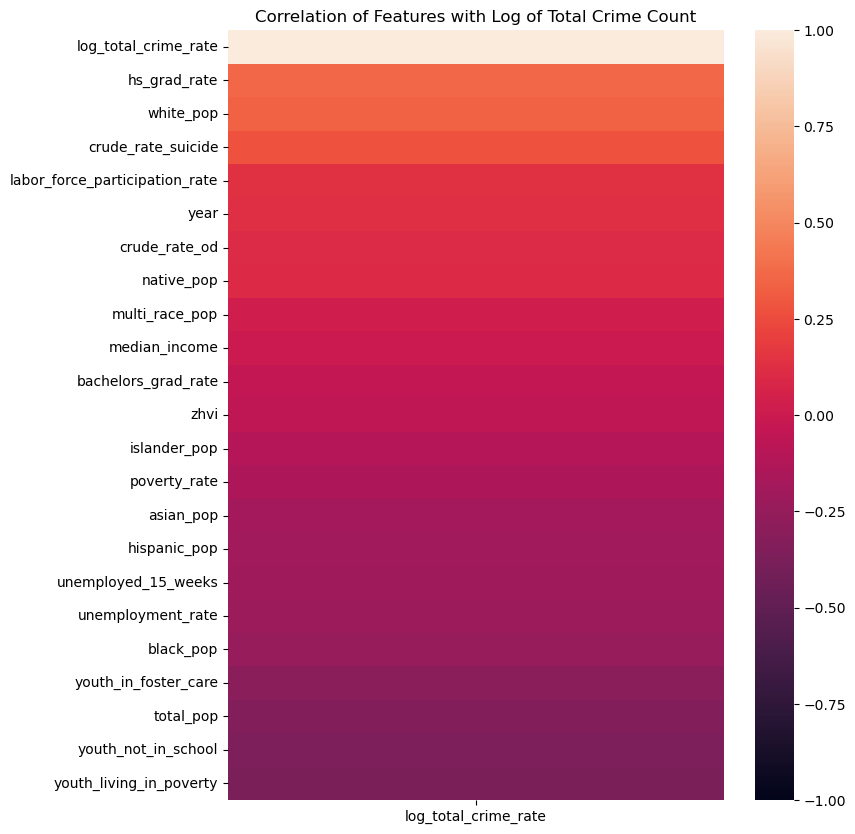

In [983]:
crime_related_features = [
    'count:__crimes_against_society', 
                           'count:__fraud_and_other_financial_crimes', 
                           'count:__property_crime', 
                           'count:__violent_crime', 'total_crime_count','rate:__crimes_against_society', 
                           'rate:__fraud_and_other_financial_crimes', 
                           'rate:__property_crime', 
                           'rate:__violent_crime','total_crime_count','total_crime_rate'
]
combined_filtered = combined.drop(columns=crime_related_features)
##calculating correlation with the log of total crime count
corr_with_crime_count = combined_filtered.corr(numeric_only=True)[['log_total_crime_rate']].sort_values(by='log_total_crime_rate', ascending=False)
plt.figure(figsize=(8,10))
sns.heatmap(corr_with_crime_count,vmin=-1,vmax=1)
top_corr_features = corr_with_crime_count
plt.title('Correlation of Features with Log of Total Crime Count');


### Pairwise Relationships Among Selected Features

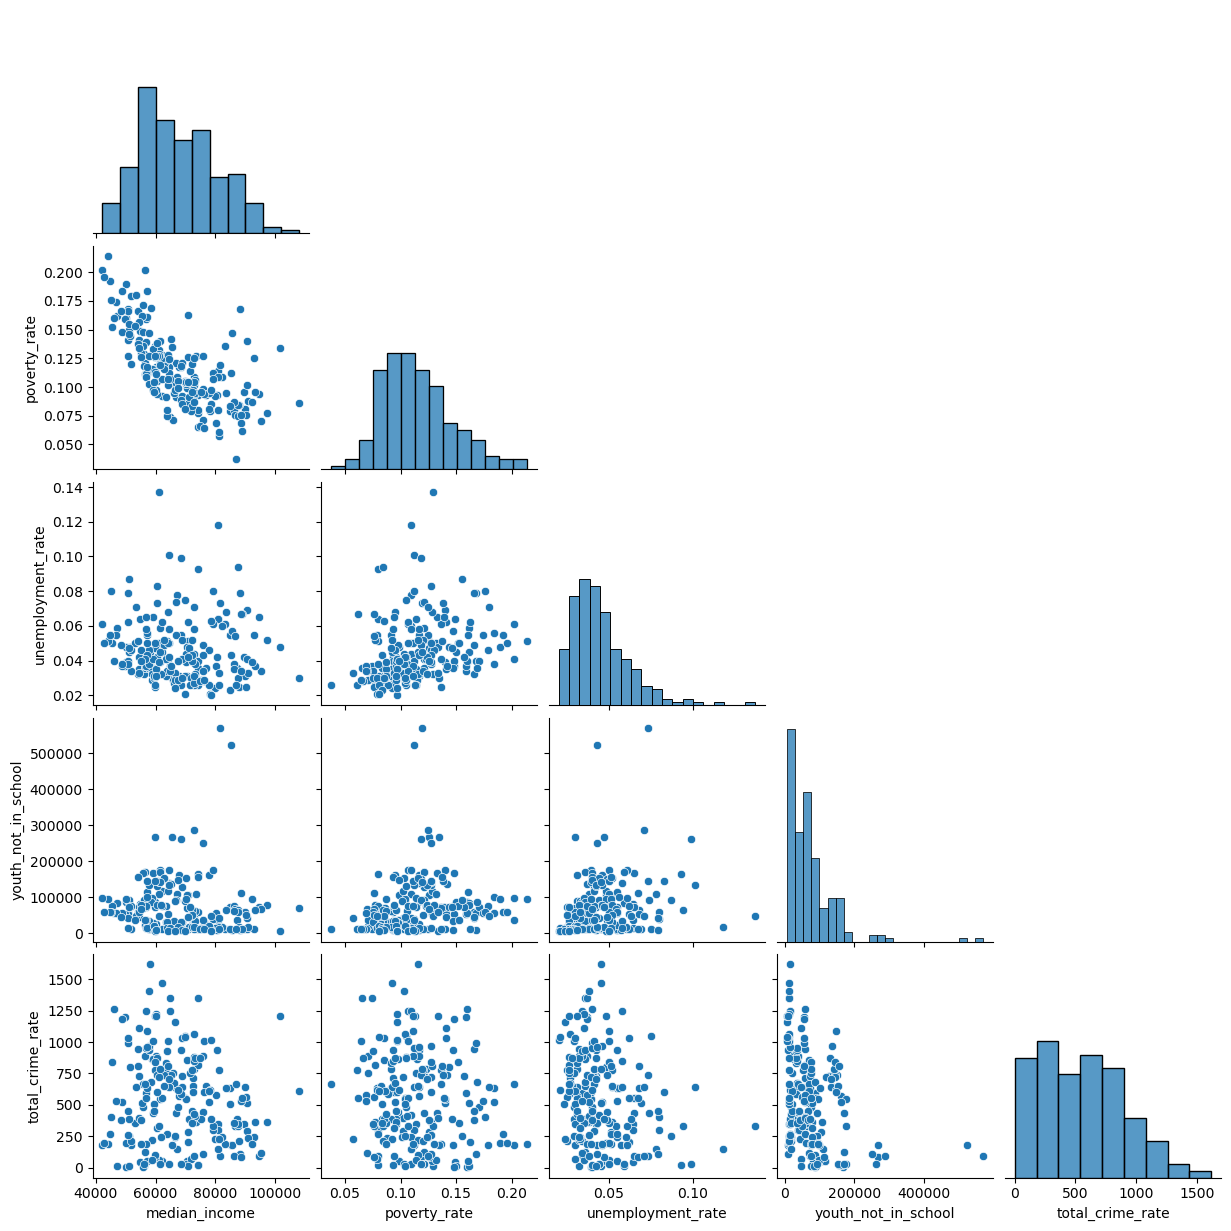

In [985]:
# Pairplot for selected features to visualize their relationships
selected_features = ['median_income', 'poverty_rate', 'unemployment_rate', 'youth_not_in_school', 'total_crime_rate']
sns.pairplot(combined[selected_features], corner=True);


### Distribution of crime rates across different states:

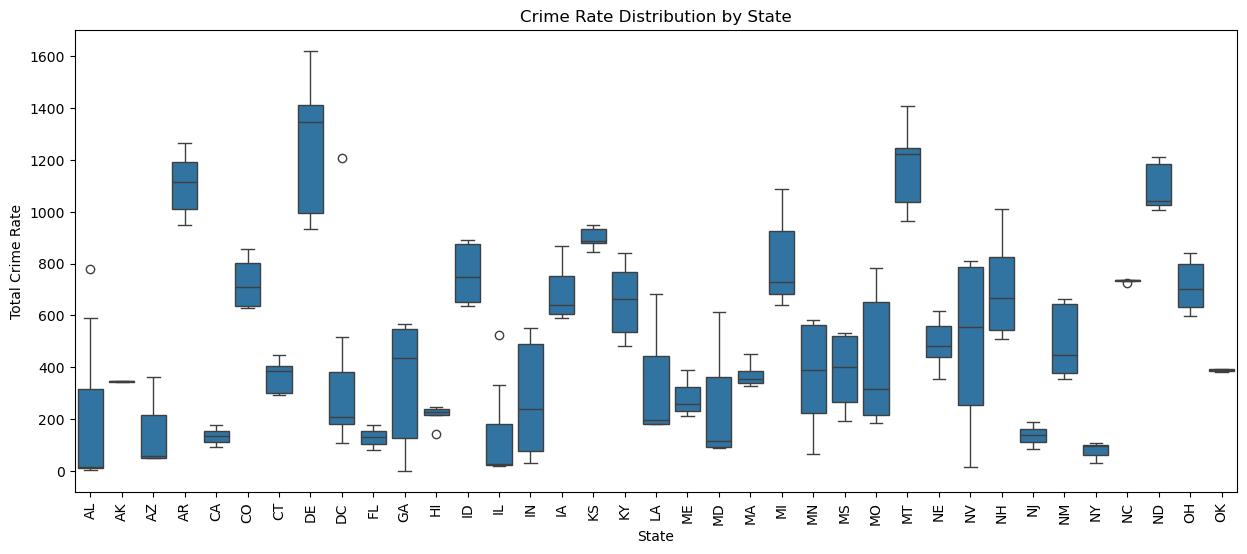

In [987]:
# boxplot to visualize the distribution of crime rates across different states
plt.figure(figsize=(15, 6))
sns.boxplot( data=combined,x='state', y='total_crime_rate')
plt.xticks(rotation=90)
plt.title('Crime Rate Distribution by State')
plt.xlabel('State')
plt.ylabel('Total Crime Rate');


The boxplot displays total crime rate variability across U.S. states, with each box representing the middle 50% of rates and the line showing the median. States like Florida and Louisiana have wide distributions, indicating significant variability, while Idaho and Utah show lower, more stable crime rates. This chart highlights state-by-state differences in crime trends, with some experiencing more fluctuation, potentially due to socioeconomic or regional factors.

###  Trends in Crime Types Over the Years

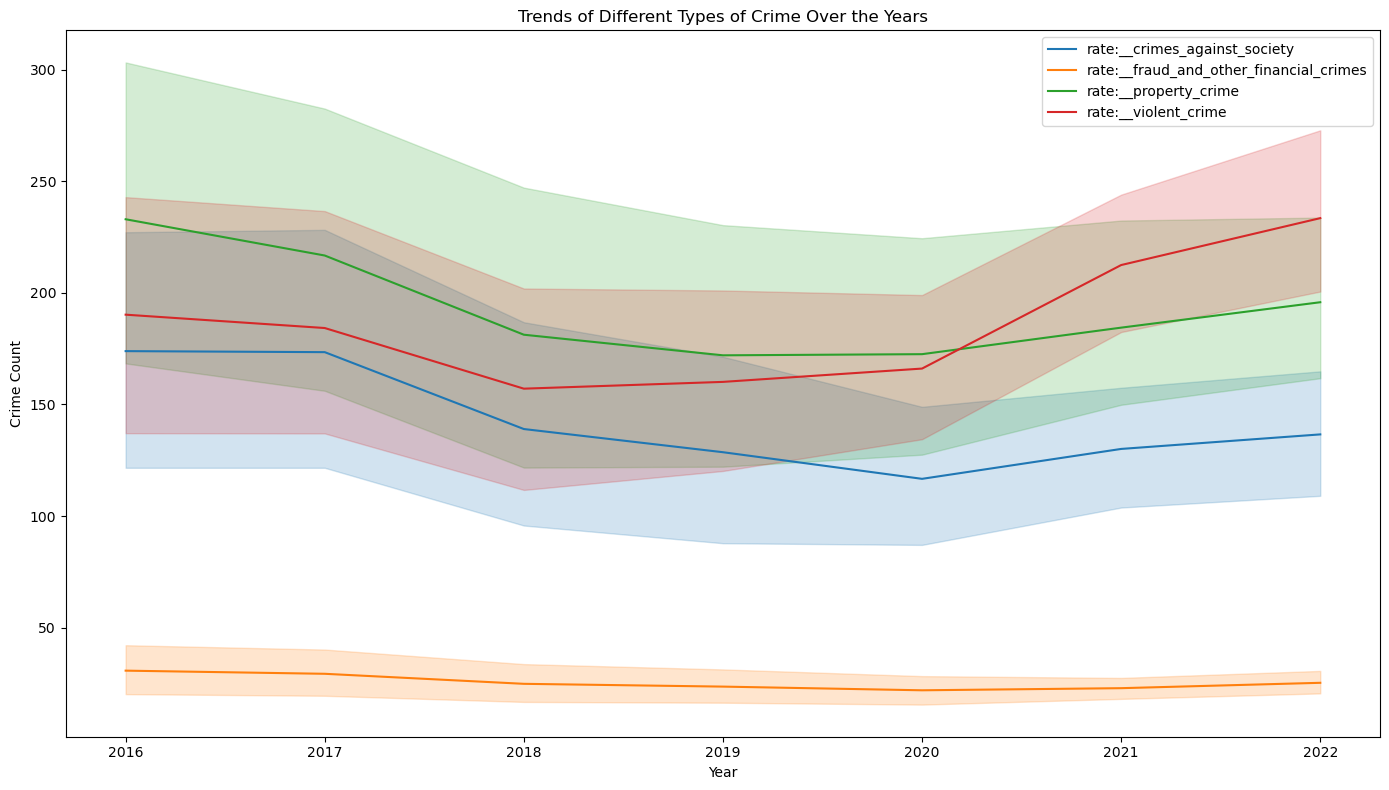

In [990]:
# line plot to visualize trends over the years for crime types


crime_trend_features = ['rate:__crimes_against_society', 'rate:__fraud_and_other_financial_crimes', 'rate:__property_crime', 'rate:__violent_crime']

plt.figure(figsize=(14, 8))

for feature in crime_trend_features:
    sns.lineplot(x='year', y=feature, data=combined, label=feature)

plt.title('Trends of Different Types of Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.legend()
plt.tight_layout()
plt.savefig('../img/trends_different_types_crime_over_years.jpg')


This line plot shows the trends for various types of crimes over the years. Each line represents a different crime category, allowing us to see how each has evolved.
- Property Crime and Violent Crime generally display higher rates compared to other categories, indicating they are more prevalent.
- Crimes Against Society and Fraud and Other Financial Crimes show lower rates.

### State-wise Trends for Poverty Rate and Total Crime Rate

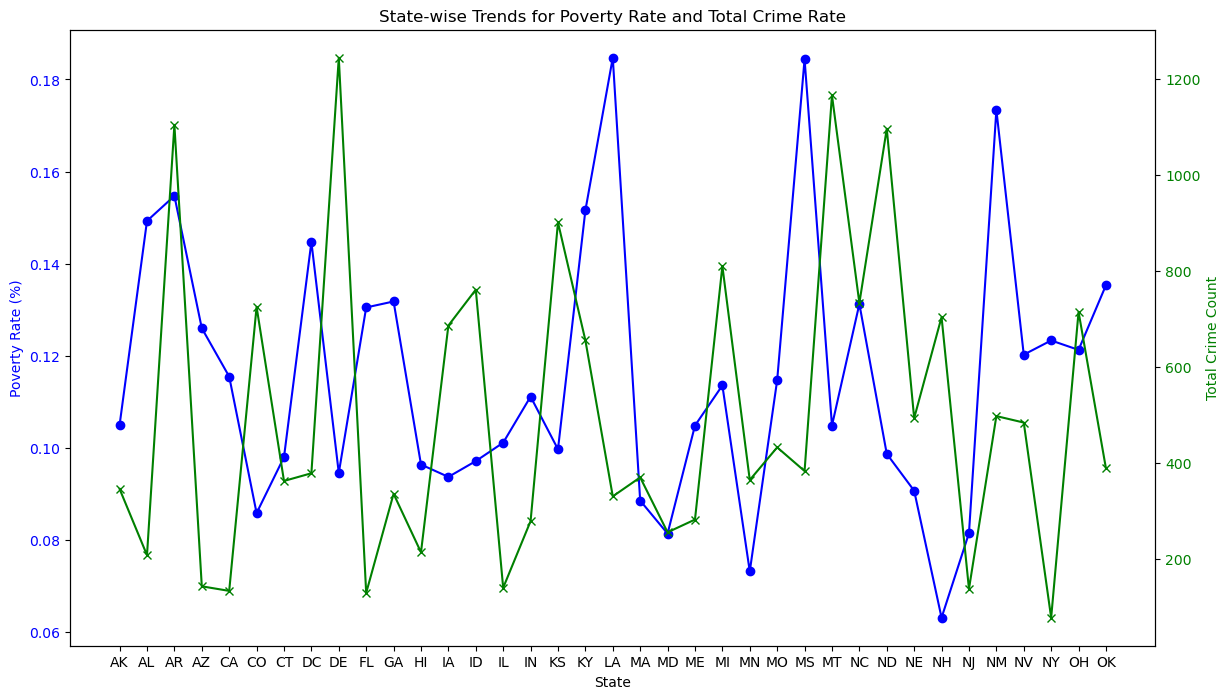

In [993]:
# Plotting state-wise trends for 'poverty_rate' and 'total_crime_rate' on the same graph

# group the data by 'state' and calculate the mean of each feature for each state
state_grouped = combined.groupby('state').mean()

# Sort states alphabetically for consistent visualization
state_grouped = state_grouped.sort_index()



plt.figure(figsize=(14, 8))

# Plot poverty rate with the left y-axis
ax1 = plt.gca()
ax1.plot(state_grouped.index, state_grouped['poverty_rate'], color='b', marker='o', label='Poverty Rate')
ax1.set_xlabel('State')
ax1.set_ylabel('Poverty Rate (%)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a twin y-axis to plot crime rate
ax2 = ax1.twinx()
ax2.plot(state_grouped.index, state_grouped['total_crime_rate'], color='g', marker='x', label='Total Crime Count')
ax2.set_ylabel('Total Crime Count', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Title and labels
plt.title('State-wise Trends for Poverty Rate and Total Crime Rate')
plt.xticks(rotation=90)
plt.grid(axis='x')



This plot shows state-wise trends for poverty rate and total crime rate across the U.S. states. The blue line represents the average poverty rate, while the green line represents the average total crime rate for each state.Some states show parallel movements in poverty and crime rates, suggesting a potential correlation, while others display differing trends.

### State-wise Trends for Unemployment Rate and Total Crime Rate

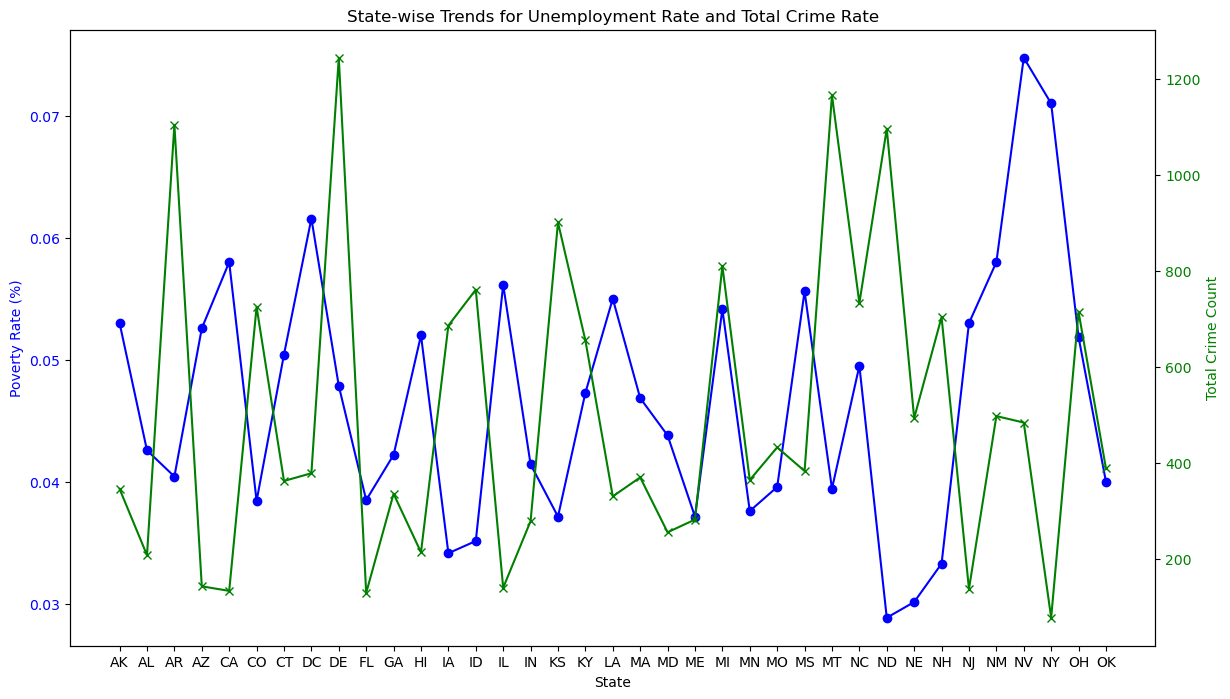

In [996]:
# Plotting state-wise trends for 'unemployment_rate' and 'total_crime_rate' on the same graph

# group the data by 'state' and calculate the mean of each feature for each state
state_grouped = combined.groupby('state').mean()

# Sort states alphabetically for consistent visualization
state_grouped = state_grouped.sort_index()



plt.figure(figsize=(14, 8))

# Plot poverty rate with the left y-axis
ax1 = plt.gca()
ax1.plot(state_grouped.index, state_grouped['unemployment_rate'], color='b', marker='o', label='Poverty Rate')
ax1.set_xlabel('State')
ax1.set_ylabel('Poverty Rate (%)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a twin y-axis to plot crime rate
ax2 = ax1.twinx()
ax2.plot(state_grouped.index, state_grouped['total_crime_rate'], color='g', marker='x', label='Total Crime Count')
ax2.set_ylabel('Total Crime Count', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Title and labels
plt.title('State-wise Trends for Unemployment Rate and Total Crime Rate')
plt.xticks(rotation=90)
plt.grid(axis='x')



This graph presents state-wise trends for the average unemployment rate (blue line, left ) and total crime rate (green line, right y-axis).While some states display similar trends in both unemployment and crime rates, indicating a possible relationship, others show divergent patterns. States with higher fluctuations in total crime rate, like Nevada and Louisiana, do not always correspond with high unemployment rates, highlighting the complexity of factors influencing crime. This visualization is useful for identifying patterns and exploring the potential correla

In [998]:
#combined.to_csv('../data/data_final.csv',index=False)

In [999]:
combined.to_csv('../data/data.csv',index=False)